# muMAG Standard Problem #5

A detailed problem description can be found [here](https://www.ctcms.nist.gov/~rdm/std5/spec5.xhtml)

## Google Colab Link

The demo can be run on Google Colab without any local installation.
Use the following [link](https://colab.research.google.com/drive/1RXlrHUtB39aHtyp2btk3GNEBS0f5ZDFk) to try it out.

In [1]:
!pip install -q magnumnp numpy==1.22.4

## Run Demo:

In [2]:
#TODO: read latest script content from gitlab repository, as soon as %load works with Colab
from magnumnp import *
import torch

Timer.enable()

# initialize state
n  = (40, 40, 1)
dx = (2.5e-9, 2.5e-9, 10e-9)
mesh = Mesh(n, dx)

state = State(mesh)
state.material = {
    "Ms": 8e5,
    "A": 1.3e-11,
    "alpha": 0.1,
    "xi": 0.05,
    "b": 72.17e-12
    }

# initialize magnetization that relaxes into s-state
state.m = state.Constant([0,0,0])
state.m[:20,:,:,1] = -1.
state.m[20:,:,:,1] = 1.
state.m[20,20,:,1] = 0.
state.m[20,20,:,2] = 1.

state.j = state.Tensor([1e12, 0, 0])

# initialize field terms
demag    = DemagField()
exchange = ExchangeField()
torque   = SpinTorqueZhangLi()

# initialize sstate
llg = LLGSolver([demag, exchange])
llg.relax(state)
write_vti(state.m, "data/m0.vti", state)

# perform integration with spin torque
llg = LLGSolver([demag, exchange, torque])
logger = Logger("data", ['t', 'm'], ["m"])
while state.t < 5e-9:
    llg.step(state, 1e-11)
    logger << state

Timer.print_report()

2023-05-08 12:41:03  magnum.np:INFO magnum.np 1.0.9
2023-05-08 12:41:03  magnum.np:INFO [State] running on device: cpu (dtype = float64)
2023-05-08 12:41:03  magnum.np:INFO [Mesh] 40x40x1 (size= 2.5e-09 x 2.5e-09 x 1e-08)
2023-05-08 12:41:03  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)
2023-05-08 12:41:03  magnum.np:INFO [DEMAG]: Time calculation of demag kernel = 0.5202043056488037 s
2023-05-08 12:41:16  magnum.np:INFO [LLG] relax: t=1e-11 dE=1.17866 E=1.10736e-17
2023-05-08 12:41:17  magnum.np:INFO [LLG] relax: t=2e-11 dE=0.54 E=7.19067e-18
2023-05-08 12:41:17  magnum.np:INFO [LLG] relax: t=3e-11 dE=0.240628 E=5.79599e-18
2023-05-08 12:41:18  magnum.np:INFO [LLG] relax: t=4e-11 dE=0.159977 E=4.99664e-18
2023-05-08 12:41:18  magnum.np:INFO [LLG] relax: t=5e-11 dE=0.107171 E=4.51298e-18
2023-05-08 12:41:19  magnum.np:INFO [LLG] relax: t=6e-11 dE=0.0733524 E=4.20457e-18
2023-05-08 12:41:19  magnum.np:INFO [LLG] relax: t=7e-11 dE=0.0499754 E=4.00444e-18
2023-05-08 12:41:

2023-05-08 12:42:08  magnum.np:INFO [LLG] step: dt= 1e-11  t=6e-10
2023-05-08 12:42:09  magnum.np:INFO [LLG] step: dt= 1e-11  t=6.1e-10
2023-05-08 12:42:11  magnum.np:INFO [LLG] step: dt= 1e-11  t=6.2e-10
2023-05-08 12:42:11  magnum.np:INFO [LLG] step: dt= 1e-11  t=6.3e-10
2023-05-08 12:42:12  magnum.np:INFO [LLG] step: dt= 1e-11  t=6.4e-10
2023-05-08 12:42:12  magnum.np:INFO [LLG] step: dt= 1e-11  t=6.5e-10
2023-05-08 12:42:13  magnum.np:INFO [LLG] step: dt= 1e-11  t=6.6e-10
2023-05-08 12:42:14  magnum.np:INFO [LLG] step: dt= 1e-11  t=6.7e-10
2023-05-08 12:42:15  magnum.np:INFO [LLG] step: dt= 1e-11  t=6.8e-10
2023-05-08 12:42:15  magnum.np:INFO [LLG] step: dt= 1e-11  t=6.9e-10
2023-05-08 12:42:16  magnum.np:INFO [LLG] step: dt= 1e-11  t=7e-10
2023-05-08 12:42:17  magnum.np:INFO [LLG] step: dt= 1e-11  t=7.1e-10
2023-05-08 12:42:17  magnum.np:INFO [LLG] step: dt= 1e-11  t=7.2e-10
2023-05-08 12:42:18  magnum.np:INFO [LLG] step: dt= 1e-11  t=7.3e-10
2023-05-08 12:42:19  magnum.np:INFO [L

2023-05-08 12:43:15  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.59e-09
2023-05-08 12:43:16  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.6e-09
2023-05-08 12:43:17  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.61e-09
2023-05-08 12:43:18  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.62e-09
2023-05-08 12:43:18  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.63e-09
2023-05-08 12:43:19  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.64e-09
2023-05-08 12:43:20  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.65e-09
2023-05-08 12:43:21  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.66e-09
2023-05-08 12:43:22  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.67e-09
2023-05-08 12:43:24  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.68e-09
2023-05-08 12:43:26  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.69e-09
2023-05-08 12:43:28  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.7e-09
2023-05-08 12:43:29  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.71e-09
2023-05-08 12:43:30  magnum.np:INFO [LLG] step: dt= 1e-11  t=1.72e-09
2023-05-08 12:43:32  m

2023-05-08 12:44:43  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.57e-09
2023-05-08 12:44:43  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.58e-09
2023-05-08 12:44:44  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.59e-09
2023-05-08 12:44:45  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.6e-09
2023-05-08 12:44:46  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.61e-09
2023-05-08 12:44:46  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.62e-09
2023-05-08 12:44:47  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.63e-09
2023-05-08 12:44:48  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.64e-09
2023-05-08 12:44:49  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.65e-09
2023-05-08 12:44:49  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.66e-09
2023-05-08 12:44:50  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.67e-09
2023-05-08 12:44:51  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.68e-09
2023-05-08 12:44:52  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.69e-09
2023-05-08 12:44:52  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.7e-09
2023-05-08 12:44:53  m

2023-05-08 12:46:00  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.55e-09
2023-05-08 12:46:01  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.56e-09
2023-05-08 12:46:02  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.57e-09
2023-05-08 12:46:03  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.58e-09
2023-05-08 12:46:03  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.59e-09
2023-05-08 12:46:04  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.6e-09
2023-05-08 12:46:05  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.61e-09
2023-05-08 12:46:06  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.62e-09
2023-05-08 12:46:07  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.63e-09
2023-05-08 12:46:08  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.64e-09
2023-05-08 12:46:09  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.65e-09
2023-05-08 12:46:10  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.66e-09
2023-05-08 12:46:10  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.67e-09
2023-05-08 12:46:11  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.68e-09
2023-05-08 12:46:12  

2023-05-08 12:47:43  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.53e-09
2023-05-08 12:47:44  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.54e-09
2023-05-08 12:47:46  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.55e-09
2023-05-08 12:47:47  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.56e-09
2023-05-08 12:47:48  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.57e-09
2023-05-08 12:47:49  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.58e-09
2023-05-08 12:47:50  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.59e-09
2023-05-08 12:47:52  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.6e-09
2023-05-08 12:47:53  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.61e-09
2023-05-08 12:47:54  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.62e-09
2023-05-08 12:47:55  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.63e-09
2023-05-08 12:47:56  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.64e-09
2023-05-08 12:47:57  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.65e-09
2023-05-08 12:47:58  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.66e-09
2023-05-08 12:47:59  


TIMER REPORT
Operation                  No of calls    Avg time [ms]    Total time [s]
-----------------------  -------------  ---------------  ----------------
LLGSolver.relax                      1     23085.6               23.0856
    DemagField.h                  3375         2.32368            7.84242
    ExchangeField.h               3375         3.7503            12.6573
LLGSolver.step                     501       880.359            441.06
    DemagField.h                 76836         3.0168           231.799
    ExchangeField.h              76836         0.429053          32.9668
    SpinTorqueZhangLi.h          76836         1.03389           79.44
-----------------------  -------------  ---------------  ----------------
Total                                                           474.321
Missing                                                          10.175



## Plot Results:

In [3]:
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp5/ref/m.dat

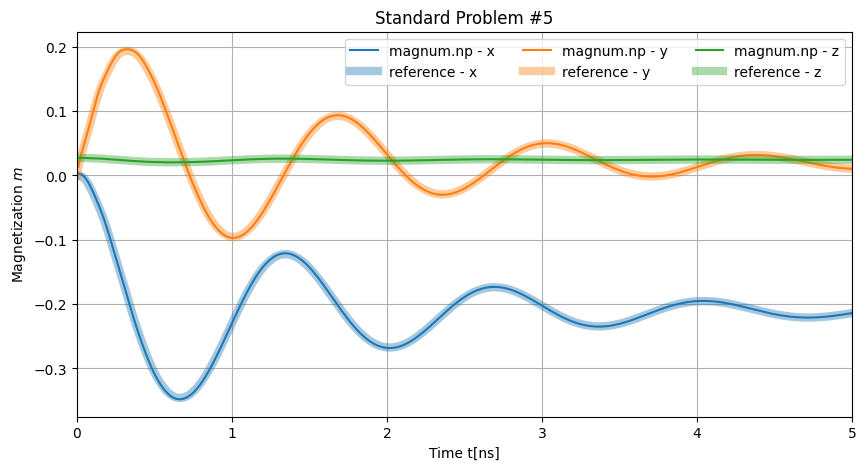

In [4]:
#TODO: read latest script content from gitlab repository, as soon as %load works with Colab

import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("data/log.dat")
ref = np.loadtxt("ref/m.dat")

fig, ax = plt.subplots(figsize=(10,5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,0]*1e9, data[:,1], '-', color = cycle[0], label = "magnum.np - x")
ax.plot(ref[:,0]*1e9, ref[:,1], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference - x")

ax.plot(data[:,0]*1e9, data[:,2], '-', color = cycle[1], label = "magnum.np - y")
ax.plot(ref[:,0]*1e9, ref[:,2], '-', color = cycle[1], linewidth = 6, alpha = 0.4, label = "reference - y")

ax.plot(data[:,0]*1e9, data[:,3], '-', color = cycle[2], label = "magnum.np - z")
ax.plot(ref[:,0]*1e9, ref[:,3], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference - z")

ax.set_xlim([0,5])
ax.set_title("Standard Problem #5")
ax.set_xlabel("Time t[ns]")
ax.set_ylabel("Magnetization $m$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")
